In [11]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(dplyr)
library(ComplexHeatmap)
library(grid)
library(circlize)

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


ComplexHeatmap version 2.22.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppr

In [1]:
#pre-processed region × celltypes seurat object, detail see this study Method, download from https://db.cngb.org/stomics/mbcsta/download/
obj_segment <- readRDS('data/Segment_celltypes_marmoset.rds')

In [4]:
#The segment border files can be downloaded at https://db.cngb.org/stomics/mbcsta/download/ or https://github.com/haoshijie13/MCCSTA
Border <- read.csv('data/Border.txt')

In [2]:
source('R_function/Pr_Al.R')
#Convert the Pr-Al Index to Intersection Index, see Figure2M
obj_segment$`Intersection-Index` <- intersection_convert(obj_segment$`Pr-Al-Index`)

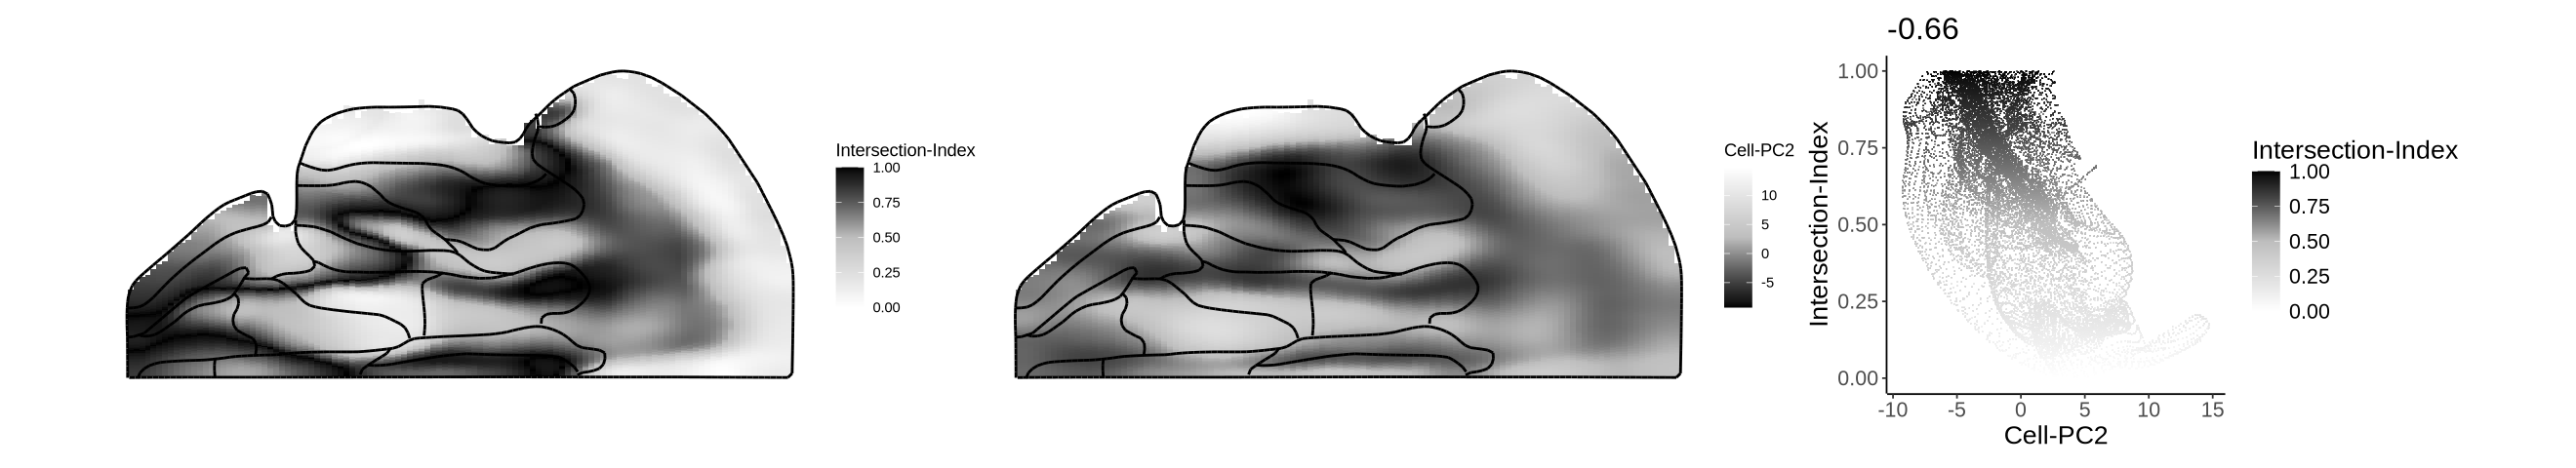

In [13]:
#Plot Intersection Index, Cell-PC2 and the correlation between them
source('R_function/Pr_Al.R')
source('R_function/segment_plot.R')
options(repr.plot.width=22,repr.plot.height=4)
plot_col_exp(obj_segment@meta.data,col_exp = 'Intersection-Index',color=c('white','gray','black'))+
plot_col_exp(obj_segment@meta.data,col_exp = 'Cell-PC2',rev=TRUE,color=c('white','gray','black'))+
plot_cor_raster(obj_segment,X='Cell-PC2',Y='Intersection-Index',var='Intersection-Index',color=c('white','gray','black'))+
plot_layout(ncol=3)